<a href="https://colab.research.google.com/github/SWHulbert/TDA-Project/blob/master/TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install ripser
!pip install persim
!git clone https://github.com/SWHulbert/TDA-Project.git
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
import PIL
from persim import plot_diagrams
from ripser import ripser, lower_star_img

In [0]:
data = np.genfromtxt('/content/TDA-Project/letters.csv', dtype=int, delimiter=',', skip_header=0)

#Scanning functions
#Currently these functions take an int from 0-31, but they should take a 1x101 array as an input instead

matrix = np.full((10, 10), 100)

def LRScan(a):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): #range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      matrix[row, column]=column # for scanning left to right
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
    
#LRScan(12)

def RLScan(a):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): #range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      matrix[row,column]=9-column # for scanning right to left
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

#RLScan(4)

def TBScan(a):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): #range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      matrix[row, column]=row
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
  
#TBScan(0)

def BTScan(a):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): #range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = (int((k-1)/10))
      column = ((k-1)%10)
      matrix[row, column]=(9-row)
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
  
#BTScan(0)

def diagBRTL(a):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:]
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = ((10-i) + (10 - j))
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
  
#diagBRTL(0)

def diagTLBR(a):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:] # Make this matrix?
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = i + j
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

def diagBLTR(a):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:]
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = (10-i)+j
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

def diagTRBL(a):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:]
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = (10-j)+i
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

#diagBRTL(4)
#BTScan(0)

In [0]:
def loadResults():
  scanResults = []
  for td in xrange(len(data)):
    tempDict = {}
    tempResult = np.array(BTScan(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['bt'] = (resultLen, resultAvg)
    
    tempResult = np.array(TBScan(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['tb'] = (resultLen, resultAvg)
    
    tempResult = np.array(LRScan(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['lr'] = (resultLen, resultAvg)
    
    tempResult = np.array(RLScan(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['rl'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagTLBR(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagTLBR'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagBRTL(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagBRTL'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagTRBL(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagTRBL'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagBLTR(td))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagBLTR'] = (resultLen, resultAvg)
    scanResults.append(tempDict)
  return scanResults

resultList = loadResults()

In [12]:
x = 0
#print(resultList[x])

#for x in range(0,2):
  #sum = 0.0
  #for a in resultList[x].values():
    #sum += a[0] ** 2 + a[1] ** 2
  #vectorLength = sum ** 0.5
  #print(x, vectorLength)
  
def vectorDistance(x, y):
  sum = 0.0
  for a in xrange(len(resultList[x])):
    sum += (resultList[x].values()[a][0] - resultList[y].values()[a][0])**2 + (resultList[x].values()[a][1] - resultList[y].values()[a][1])**2
  dist = sum ** 0.5
  return dist

for a in xrange(len(resultList[x])):
  print(resultList[x].values()[a])

#print(resultList[x].values())
#vectorDistance(0, 2)
#print(len(resultList[x].values()))

def guess(x):
  distList = []
  for j in range(0,x) + range(x+1, 32):
    distList.append(vectorDistance(x,j))
  guessLetter = min(distList)
  if distList.index(guessLetter) >= x:
    print(guessLetter, x, distList.index(guessLetter) + 1)
    return (distList.index(guessLetter) + 1)
  else:
    print(guessLetter, x, distList.index(guessLetter))
    return (distList.index(guessLetter))

#guess(x)
#for x in range(0,32):
  #guess(x)

(1, 95.0)
(1, 96.0)
(2, 48.0)
(2, 51.0)
(1, 99.0)
(2, 49.0)
(1, 98.0)
(1, 100.0)


[[100 100 100 100 100 100 100 100 100 100]
 [100 100   7   6   5   4   3 100 100 100]
 [100 100   7 100 100 100 100 100 100 100]
 [100   8   7 100 100 100 100 100 100 100]
 [100   8   7 100 100 100 100 100 100 100]
 [100   8   7   6   5   4   3 100 100 100]
 [100 100   7 100 100 100   3 100 100 100]
 [100 100   7   6   5   4   3 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


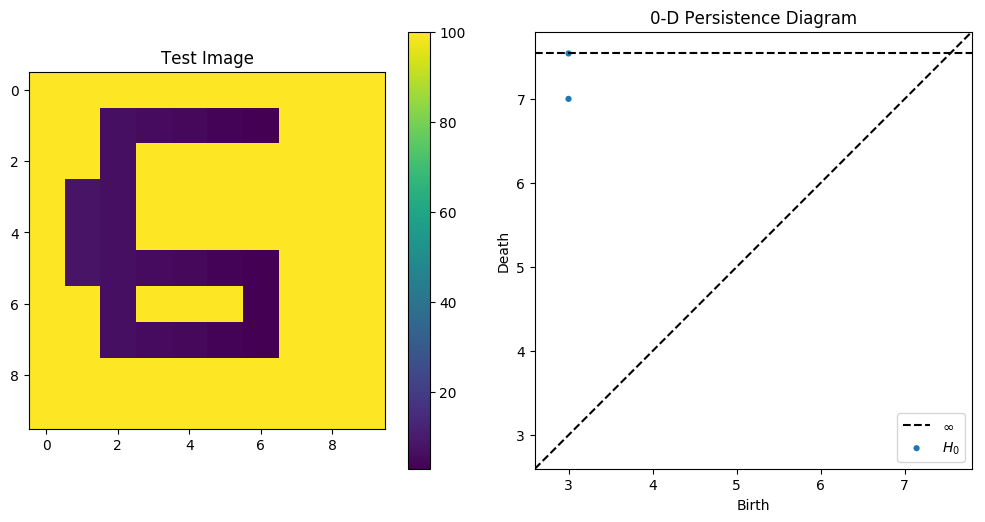

In [61]:
RLScan(x)
print(matrix)
dgm = lower_star_img(matrix)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(matrix)
plt.colorbar()
plt.title('Test Image')
plt.subplot(122)
plot_diagrams(dgm)
plt.title('0-D Persistence Diagram')
plt.tight_layout()
plt.show()

In [9]:
full1 = np.full((1,101), 1)
print(len(a))

1
